### Problem background
Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

 

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

1. Which type of hosts to acquire more and where?
2. The categorisation of customers based on their preferences.
3. What are the neighbourhoods they need to target?
4. What is the pricing ranges preferred by customers?
5. The various kinds of properties that exist w.r.t. customer preferences.
6. Adjustments in the existing properties to make it more customer-oriented.
7. What are the most popular localities and properties in New York currently?
8. How to get unpopular properties more traction? and so on...

Note: These points are just to give you an initial understanding of how to proceed with the analysis and the kind of questions you need to ask. In addition to this, you would need to further understand the data (attached below in this page) and analyse important insights that you feel are required for the audiences mentioned for each of the two presentations.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 999)
df = pd.read_csv("AB_NYC_2019.csv", header=0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47896,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,23-06-2019,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Renaming the columns "neighbourhood_group" to "location", "neighbourhood" to "area"

In [6]:
df.rename(columns={"neighbourhood_group": "location", "neighbourhood": "area"},inplace=True)

In [7]:
df.head()

,id,name,host_id,host_name,location,area,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Dropping the missing values 

In [8]:
df.shape

(48895, 16)

In [9]:
df1 = df[~df.name.isnull()].copy()

In [10]:
df1.shape

(48879, 16)

In [11]:
df1.name.isnull().sum()

0

### Replacing Host_name values with mode

In [12]:
df1.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
location                              0
area                                  0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
name_host_fill = df1.host_name.mode()[0]
name_host_fill

'Michael'

In [14]:
df1.host_name.fillna(name_host_fill,inplace=True)

In [15]:
df1.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
location                              0
area                                  0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

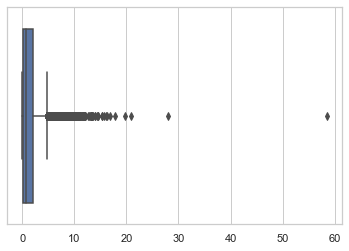

In [16]:
data = df1.reviews_per_month.tolist()

sns.set_theme(style="whitegrid")
sns.boxplot(data)

# plt.boxplot(data, notch=True, showfliers=False)
plt.show()

### Replace reviews_per_month column with its median value

In [17]:
median = df1['reviews_per_month'].median()
median

0.72

In [18]:
df1.reviews_per_month.replace(np.nan, median, inplace=True)

In [19]:
df1.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
location                              0
area                                  0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Replace last_review column data with the one that comes directly after it and then replacing any remaining NaN's with mode

In [20]:
df1.last_review.fillna(method='bfill', axis = 0 , inplace=True)

In [21]:
df1.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
location                           0
area                               0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       42
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [22]:
df1.last_review.value_counts(normalize=True)

01-07-2019    0.037738
30-06-2019    0.037615
23-06-2019    0.035854
07-07-2019    0.022995
24-06-2019    0.021398
                ...   
17-10-2013    0.000020
08-07-2014    0.000020
04-12-2013    0.000020
29-09-2014    0.000020
10-07-2014    0.000020
Name: last_review, Length: 1764, dtype: float64

In [23]:
mode = df1['last_review'].mode()[0]
mode

'01-07-2019'

In [24]:
df1.last_review.replace(np.nan, mode, inplace=True)

In [25]:
df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
location                          0
area                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Missing values treated now looking for datatypes of all the columns 

In [26]:
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
location                           object
area                               object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [27]:
df1.last_review

0        19-10-2018
1        21-05-2019
2        05-07-2019
3        05-07-2019
4        19-11-2018
            ...    
48890    01-07-2019
48891    01-07-2019
48892    01-07-2019
48893    01-07-2019
48894    01-07-2019
Name: last_review, Length: 48879, dtype: object

In [28]:
df1.last_review = pd.to_datetime(df1.last_review)

In [29]:
df1.last_review

0       2018-10-19
1       2019-05-21
2       2019-05-07
3       2019-05-07
4       2018-11-19
           ...    
48890   2019-01-07
48891   2019-01-07
48892   2019-01-07
48893   2019-01-07
48894   2019-01-07
Name: last_review, Length: 48879, dtype: datetime64[ns]

In [32]:
df1.last_review.dt.day

0        19
1        21
2         7
3         7
4        19
         ..
48890     7
48891     7
48892     7
48893     7
48894     7
Name: last_review, Length: 48879, dtype: int64

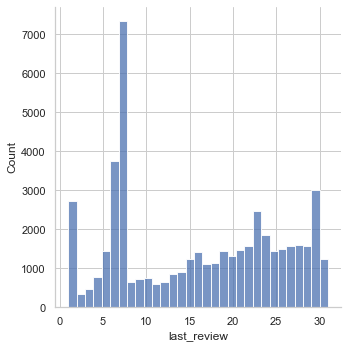

In [40]:
sns.displot(df1.last_review.dt.day , bins = 31)
plt.show()

In [31]:
# df1.to_csv("extract.csv",index=False)